# Logistic Regression

## Data Source and Contents

In [120]:
# import packacges
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [121]:
# read dataset
df = pd.read_csv('https://github.com/ArinB/CA05-B-Logistic-Regression/raw/master/cvd_data.csv')

In [122]:
# inspect dataset
df.head()

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.0,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.0,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.5,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.0,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.0,0,0,0,2,1,1,2


## Binary Classifier Model

In [123]:
# select datasets to split
X = df.drop(['cvd_4types'], axis = 1)
y = df.cvd_4types

In [124]:
# split datasets into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [125]:
# fit the Logistic Regression model
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [126]:
# make predictions using testing data
y_pred = lr.predict(X_test)

## Feature Importance

In [127]:
# find coefficients
lr.coef_

array([[ 4.68835878e-03, -9.51485575e-01,  2.26731131e-01,
        -1.29982432e-01, -5.83165339e-02, -4.28603708e-02,
         8.71889242e-02, -3.73350271e-02, -3.67597090e-04,
        -8.99414620e-02,  1.24917236e-01,  4.81931201e-01,
         1.41244411e-01, -9.14967171e-02,  9.73364863e-02,
        -5.09745472e-01]])

In [128]:
# store coefficients in dictionary
coef_dict = list(zip(X, lr.coef_[0, :]))
coef_dict

[('age_s1', 0.0046883587848219836),
 ('race', -0.9514855749389501),
 ('educat', 0.2267311313888807),
 ('mstat', -0.12998243158532102),
 ('hip', -0.05831653391642086),
 ('neck20', -0.042860370798138495),
 ('waist', 0.087188924160404),
 ('av_weight_kg', -0.03733502707273492),
 ('cgpkyr', -0.0003675970902100086),
 ('tea15', -0.08994146196038343),
 ('srhype', 0.12491723628074355),
 ('parrptdiab', 0.4819312010438825),
 ('bend25', 0.141244411495997),
 ('happy25', -0.0914967171401556),
 ('tired25', 0.09733648626059227),
 ('hlthlm25', -0.509745472368062)]

In [129]:
# display coefficients in table
coef_table = pd.DataFrame(coef_dict, columns = ['Feature', 'Coefficient'])
coef_table

,Feature,Coefficient
0,age_s1,0.004688
1,race,-0.951486
2,educat,0.226731
3,mstat,-0.129982
4,hip,-0.058317
5,neck20,-0.042860
6,waist,0.087189
7,av_weight_kg,-0.037335
8,cgpkyr,-0.000368
9,tea15,-0.089941


In [130]:
# sort coefficients by feature importance
coef_table.sort_values(by = 'Coefficient', key = abs, ascending = False)

,Feature,Coefficient
1,race,-0.951486
15,hlthlm25,-0.509745
11,parrptdiab,0.481931
2,educat,0.226731
12,bend25,0.141244
3,mstat,-0.129982
10,srhype,0.124917
14,tired25,0.097336
13,happy25,-0.091497
9,tea15,-0.089941


## Evaluating Performance

In [131]:
# Logistic Regression accuracy
lr.score(X_train, y_train)

0.6964212258329905

In [132]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('True Negatives:', cm[0,0])
print('True Positives:', cm[1,1])
print('False Negatives:', cm[1,0])
print('False Negatives:', cm[0,1])

True Negatives: 149
True Positives: 415
False Negatives: 73
False Negatives: 174


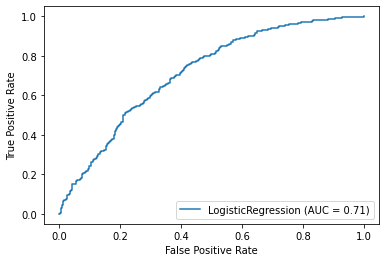

In [133]:
# ROC Curve
metrics.plot_roc_curve(lr, X_test, y_test)